In [3]:
import numpy as np
np.seterr(all='ignore')
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
np.random.seed(seed=1)

# Linear Regression
#### Define target function

In [5]:
x = np.random.uniform(0,1,20)

def f(x): return x * 2

noise_variance = 0.2
noise = np.random.randn(x.shape[0]) * noise_variance

t = f(x) + noise

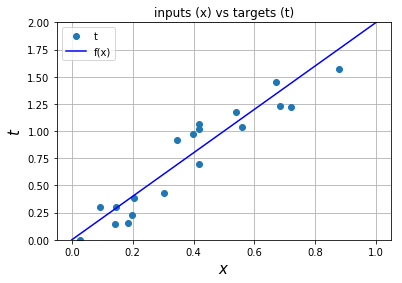

In [6]:
plt.plot(x, t, 'o', label='t')
plt.plot([0,1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$t$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (t)')
plt.grid()
plt.legend(loc=2)
plt.show()

#### Define the cost function

$C = \sum^{N}_{i=1} ||t_i - y_i||^2$ Thus, <br> <br>
$argmin_w \sum^{N}_{i=1} || t_i - y_i||^2$

In [7]:
def nn(x,w): return x * w

def cost(y,t): return ((t-y)**2).sum()

In [9]:
# plot cost vs the given weight w
ws = np.linspace(0,4, num=100)
cost_ws = np.vectorize(lambda w: cost(nn(x,w),t))(ws)

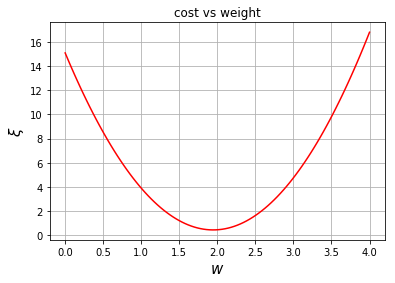

In [10]:
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('cost vs weight')
plt.grid()
plt.show()

### Optimizing the cost function
#### Gradient Descent

In [11]:
# remember y = nn(x,w) = x * w
def gradient(w,x,t):
    return 2 * x * (nn(x,w) - t)

def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# initial weight parameter
w = 0.1
# set learning rate
learning_rate = 0.1

nb_of_iterations = 4
w_cost = [(w, cost(nn(x,w), t))]
for i in range(nb_of_iterations):
    dw = delta_w(w,x,t,learning_rate)
    w = w - dw
    w_cost.append((w,cost(nn(x,w), t)))

for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i,w_cost[i][0], w_cost[i][1]))

w(0): 0.1000 	 cost: 13.6197
w(1): 1.5277 	 cost: 1.1239
w(2): 1.8505 	 cost: 0.4853
w(3): 1.9234 	 cost: 0.4527
w(4): 1.9399 	 cost: 0.4510


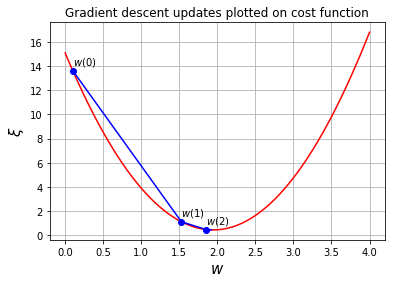

In [12]:
plt.plot(ws, cost_ws, 'r-')

for i in range(0,len(w_cost)-2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1,c1,'bo')
    plt.plot([w1, w2], [c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$w({})$'.format(i))

plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.show()

In [13]:
# 10 iteration test
w = 0
nb_of_iterations = 10
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)
    w = w - dw

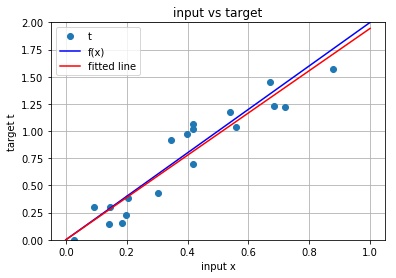

In [14]:
plt.plot(x, t, 'o', label='t')
plt.plot([0,1], [f(0), f(1)], 'b-', label='f(x)')
plt.plot([0,1], [0*w, 1*w], 'r-', label='fitted line')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs target')
plt.grid()
plt.legend(loc=2)
plt.show()

# Logistic Regression
### Define the class distributions

In [15]:
nb_of_samples_per_class = 20
red_mean = [-1, 0]
blue_mean = [1, 0]
std_dev = 1.2

x_red = np.random.randn(nb_of_samples_per_class, 2) * std_dev + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2) * std_dev + blue_mean

X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_samples_per_class,1)), np.ones((nb_of_samples_per_class,1))))

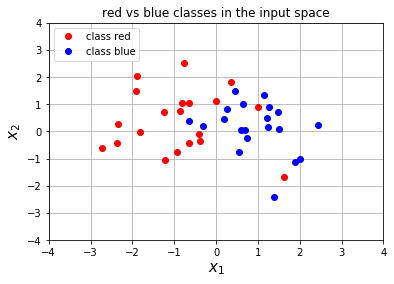

In [16]:
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='class red')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-4, 4, -4, 4])
plt.title('red vs blue classes in the input space')
plt.show()

### Logistic Function and Cross-entropy cost function
#### Logistic Function
$\sigma(z)=\frac{1}{1+e^{-z}}$
#### Cros-entropy cost function
$\xi(t_i,y_i) = -\sum^{n}_{i=1} [t_i log(y_i) + (1 - t_i) log (1 - y_i)]$

In [17]:
def logistic(z):
    return 1 / (1+np.exp(-z))

def nn(x,w):
    return logistic(x.dot(w.T))

def nn_predict(x,w):
    return np.around(nn(x,w))

def cost(y, t):
    return - np.sum(np.multiply(t,np.log(y)) + np.multiply((1-t),np.log(1-y)))

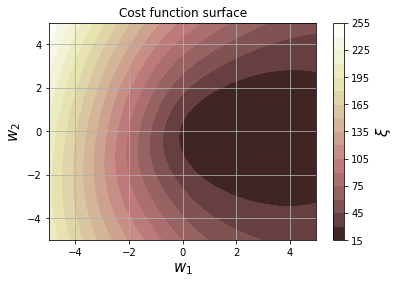

In [18]:
nb_of_ws = 100 #compute the cost nb_of_ws times in each dimenstion
ws1 = np.linspace(-5, 5, num=nb_of_ws)
ws2 = np.linspace(-5, 5, num=nb_of_ws)
ws_x, ws_y = np.meshgrid(ws1, ws2)
cost_ws = np.zeros((nb_of_ws, nb_of_ws))

for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        cost_ws[i,j] = cost(nn(X, np.asmatrix([ws_x[i,j], ws_y[i,j]])), t)

plt.contourf(ws_x, ws_y, cost_ws, 20, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=15)
plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Cost function surface')
plt.grid()
plt.show()

### Gradient descent optimization of the cost function


In [19]:
def gradient(w,x,t):
    return (nn(x,w)-t).T * x

def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x,t)

#### Gradient descent updates

In [20]:
w = np.asmatrix([-4, -2])
learning_rate = 0.05

nb_of_iterations = 10
w_iter = [w]
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate)
    w = w-dw
    w_iter.append(w)

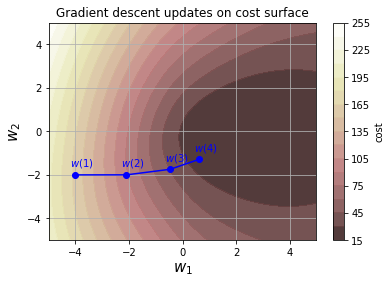

In [21]:
plt.contourf(ws_x, ws_y, cost_ws, 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
cbar.ax.set_ylabel('cost')

for i in range(1,4):
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    
    plt.plot(w1[0,0], w1[0,1], 'bo')
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'b-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, '$w({})$'.format(i), color='b')
w1 = w_iter[3]

plt.plot(w1[0,0], w1[0,1], 'bo')
plt.text(w1[0,0]-0.2, w1[0,1]+0.4, '$w({})$'.format(4), color='b')

plt.xlabel('$w_1$', fontsize=15)
plt.ylabel('$w_2$', fontsize=15)
plt.title('Gradient descent updates on cost surface')
plt.grid()
plt.show()

### Visualization of the trained classifier

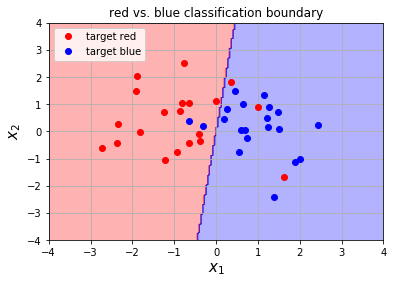

In [22]:
nb_of_xs = 200
xs1 = np.linspace(-4, 4, num=nb_of_xs)
xs2 = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2)

classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(np.asmatrix([xx[i,j], yy[i,j]]),w)
    
cmap = ListedColormap([
    colorConverter.to_rgba('r', alpha=0.30),
    colorConverter.to_rgba('b', alpha=0.30)])

plt.contourf(xx,yy, classification_plane, cmap=cmap)
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='target red')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='target blue')
plt.grid()
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.title('red vs. blue classification boundary')
plt.show()

# Hidden Layer

### Define dataset

In [23]:
nb_of_samples_per_class = 20
blue_mean = [0]
red_left_mean = [-2]
red_right_mean = [2]

std_dev = 0.5

x_blue = np.random.randn(nb_of_samples_per_class, 1) * std_dev + blue_mean
x_red_left = np.random.randn(int(nb_of_samples_per_class/2), 1) * std_dev + red_left_mean
x_red_right = np.random.randn(int(nb_of_samples_per_class/2), 1) * std_dev + red_right_mean

x = np.vstack((x_blue, x_red_left, x_red_right))
t = np.vstack((np.ones((x_blue.shape[0], 1)),
              np.zeros((x_red_left.shape[0], 1)),
              np.zeros((x_red_right.shape[0], 1))))

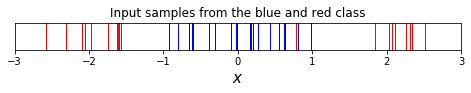

In [24]:
plt.figure(figsize=(8, 0.5))
plt.xlim(-3, 3)
plt.ylim(-1,1)

plt.plot(x_blue, np.zeros_like(x_blue), 'b|', ms = 30)
plt.plot(x_red_left, np.zeros_like(x_red_left), 'r|', ms=30)
plt.plot(x_red_right, np.zeros_like(x_red_right), 'r|', ms=30)
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Input samples from the blue and red class')
plt.xlabel('$x$', fontsize=15)
plt.show()

### Non-linear transfer function

$RBF = \phi(z) = e^{-z^2}$
<br><br>
$\frac{d\phi(z)}{dz} = -2ze^{-z^2} = -2z\phi(z)$

In [25]:
def rbf(z):
    return np.exp(-z**2)

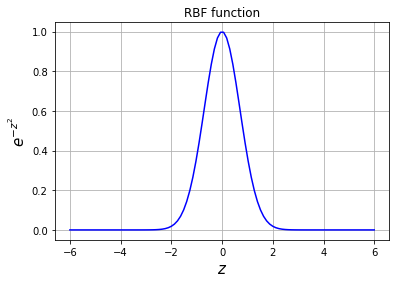

In [26]:
z = np.linspace(-6, 6, 100)
plt.plot(z, rbf(z), 'b-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$e^{-z^2}$', fontsize=15)
plt.title('RBF function')
plt.grid()
plt.show()

### Optimization by backpropagation

1. A forward propagation step to compute the output of the network
2. A backward propagation step in which the error at the end of the network is propagated backward through all the neurons while updating their parameters

#### 1. Forward step

$\mathbf{h} = \phi(\mathbf{x} * w_h) = e^{-(\mathbf{x}*w_h)^2}$
<br> <br>
$\mathbf{y} = \sigma(\mathbf{h} * w_o - 1) = \frac{1}{1+e^{-\mathbf{h}*w_o-1}}$

In [27]:
def logistic(z):
    return 1 / (1 + np.exp(-z))

def hidden_activations(x, wh):
    return rbf(x * wh)

def output_activations(h, wo):
    return logistic(h * wo - 1)

def nn(x, wh, wo):
    return output_activations(hidden_activations(x,wh), wo)

# return class
def nn_predict(x, wh, wo):
    return np.around(nn(x, wh, wo))

### Backward step
Compute the cost function : <br> <br>

$\xi(t_i, y_i) = -[t_i log(y_i) + (1-t_i)log(1-y_i)]$

In [28]:
def cost(y, t):
    return - np.sum(np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y)))

def cost_for_param(x, wh, wo, t):
    return cost(nn(x,wh,wo), t)

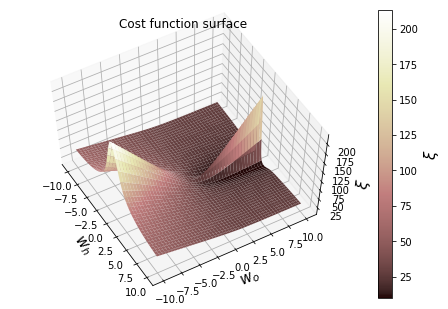

In [29]:
nb_of_ws = 200
wsh = np.linspace(-10, 10, num=nb_of_ws) # hidden weights
wso = np.linspace(-10, 10, num=nb_of_ws) # output weights
ws_x, ws_y = np.meshgrid(wsh, wso)
cost_ws = np.zeros((nb_of_ws, nb_of_ws))

for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        cost_ws[i,j] = cost(nn(x, ws_x[i,j], ws_y[i,j]), t)

fig = plt.figure()
ax = Axes3D(fig)

surf = ax.plot_surface(ws_x, ws_y, cost_ws, linewidth=0, cmap=cm.pink)
ax.view_init(elev=60, azim=-30)
cbar = fig.colorbar(surf)
ax.set_xlabel('$w_h$', fontsize=15)
ax.set_ylabel('$w_o$', fontsize=15)
ax.set_zlabel('$\\xi$', fontsize=15)
cbar.ax.set_ylabel('$\\xi$', fontsize=15)
plt.title('Cost function surface')
plt.grid()
plt.show()

### Update the output layer

In [30]:
def gradient_output(y,t):
    return y-t

def gradient_weight_out(h,grad_output):
    return h * grad_output

def gradient_hidden(wo, grad_output):
    return wo * grad_output

def gradient_weight_hidden(x, zh, h, grad_hidden):
    return x * -2 * zh * h * grad_hidden

def backprop_update(x, t, wh, wo, learning_rate):
    zh = x * wh
    h = rbf(zh)
    y = output_activations(h, wo)
    
    grad_output = gradient_output(y, t)
    
    d_wo = learning_rate * gradient_weight_out(h, grad_output)
    
    grad_hidden = gradient_hidden(wo, grad_output)
    
    d_wh = learning_rate * gradient_weight_hidden(x, zh, h, grad_hidden)
    
    return (wh-d_wh.sum(), wo-d_wo.sum())

### Backpropagation updates

In [31]:
wh = 2
wo = -5
learning_rate = 0.2

nb_of_iterations = 50
lr_update = learning_rate / nb_of_iterations
w_cost_iter = [(wh, wo, cost_for_param(x, wh, wo, t))]
for i in range(nb_of_iterations):
    learning_rate -= lr_update
    wh, wo = backprop_update(x, t, wh, wo, learning_rate)
    w_cost_iter.append((wh, wo, cost_for_param(x, wh, wo, t)))

print('final cost is {:.2f} for weights wh: {:.2f} and wo: {:.2f}'.format(cost_for_param(x, wh, wo, t), wh, wo))

final cost is 14.64 for weights wh: 1.84 and wo: 4.77


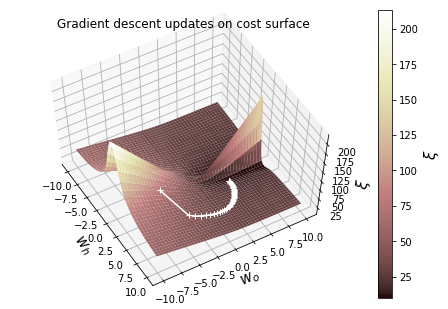

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(ws_x, ws_y, cost_ws, linewidth=0, cmap=cm.pink)
ax.view_init(elev=60, azim=-30)
cbar = fig.colorbar(surf)
cbar.ax.set_ylabel('$\\xi$', fontsize=15)

for i in range(1, len(w_cost_iter)):
    wh1, wo1, c1 = w_cost_iter[i-1]
    wh2, wo2, c2 = w_cost_iter[i]
    
    ax.plot([wh1], [wo1], [c1], 'w+')
    ax.plot([wh1, wh2], [wo1, wo2], [c1, c2], 'w-')
    
wh1, wo1, c1 = w_cost_iter[len(w_cost_iter)-1]
ax.plot([wh1], [wo1], c1, 'w+')

ax.set_xlabel('$w_h$', fontsize=15)
ax.set_ylabel('$w_o$', fontsize=15)
ax.set_zlabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates on cost surface')
plt.grid()
plt.show()

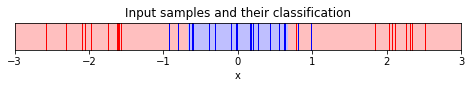

In [33]:
# Plot the resulting decision boundary
# Generate a grid over the input space to plot the color of the
#  classification at that grid point
nb_of_xs = 100
xs = np.linspace(-3, 3, num=nb_of_xs)
ys = np.linspace(-1, 1, num=nb_of_xs)
xx, yy = np.meshgrid(xs, ys) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(xx[i,j], wh, wo)
# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.25),
        colorConverter.to_rgba('b', alpha=0.25)])

# Plot the classification plane with decision boundary and input samples
plt.figure(figsize=(8,0.5))
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.xlim(-3,3)
plt.ylim(-1,1)
# Plot samples from both classes as lines on a 1D space
plt.plot(x_blue, np.zeros_like(x_blue), 'b|', ms = 30) 
plt.plot(x_red_left, np.zeros_like(x_red_left), 'r|', ms = 30) 
plt.plot(x_red_right, np.zeros_like(x_red_right), 'r|', ms = 30) 
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Input samples and their classification')
plt.xlabel('x')
plt.show()

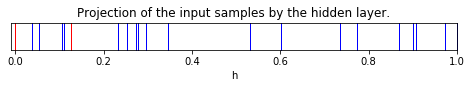

In [34]:

 # Plot projected samples from both classes as lines on a 1D space
plt.figure(figsize=(8,0.5))
plt.xlim(-0.01,1)
plt.ylim(-1,1)
# Plot projected samples
plt.plot(hidden_activations(x_blue, wh), np.zeros_like(x_blue), 'b|', ms = 30) 
plt.plot(hidden_activations(x_red_left, wh), np.zeros_like(x_red_left), 'r|', ms = 30) 
plt.plot(hidden_activations(x_red_right, wh), np.zeros_like(x_red_right), 'r|', ms = 30) 
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Projection of the input samples by the hidden layer.')
plt.xlabel('h')
plt.show()

### Softmax Function

In [35]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

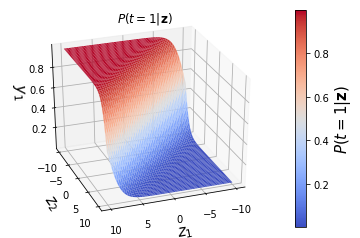

In [39]:
nb_of_zs = 200
zs = np.linspace(-10,10, num=nb_of_zs) # input
zs_1, zs_2 = np.meshgrid(zs, zs)
y = np.zeros((nb_of_zs, nb_of_zs, 2))

for i in range(nb_of_zs):
    for j in range(nb_of_zs):
        y[i,j,:] = softmax(np.asarray([zs_1[i,j], zs_2[i,j]]))
        
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(zs_1, zs_2, y[:,:,0], linewidth=0, cmap=cm.coolwarm)
ax.view_init(elev=30, azim=70)
cbar = fig.colorbar(surf)
ax.set_xlabel('$z_1$', fontsize=15)
ax.set_ylabel('$z_2$', fontsize=15)
ax.set_zlabel('$y_1$', fontsize=15)
ax.set_title('$P(t=1|\mathbf{z})$')
cbar.ax.set_ylabel('$P(t=1|\mathbf{z})$', fontsize=15)
plt.grid()
plt.show()

### Vectorization

In [40]:
import sklearn.datasets

In [41]:
X, t = sklearn.datasets.make_circles(n_samples=100, shuffle=False, factor=0.3, noise=0.1)
T = np.zeros((100,2))
T[t==1, 1] = 1
T[t==0, 0] = 1

x_red = X[t==0]
x_blue = X[t==1]

print('shape of X: {}'.format(X.shape))
print('shape of T: {}'.format(T.shape))

shape of X: (100, 2)
shape of T: (100, 2)


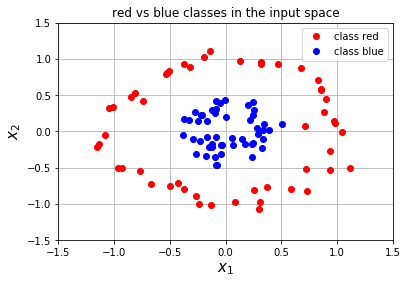

In [43]:
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='class red')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='class blue')
plt.grid()
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classes in the input space')
plt.show()